# Anomaly Detection

### Importing the Necessary Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.anomaly import *
mpl.rcParams['figure.dpi'] = 300

### Loading the Dataset

In [152]:
replace_dict = { "Channel": {1: "Horeca", 2: "Retail"},
            "Region":  {1: "Lisbon", 2: "Oporto", 3: "Other"} }

data = get_data('wholesale', verbose = False)
data.replace(replace_dict, inplace = True) 

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Horeca,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicassen        440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


### Exploratory Data Analysis

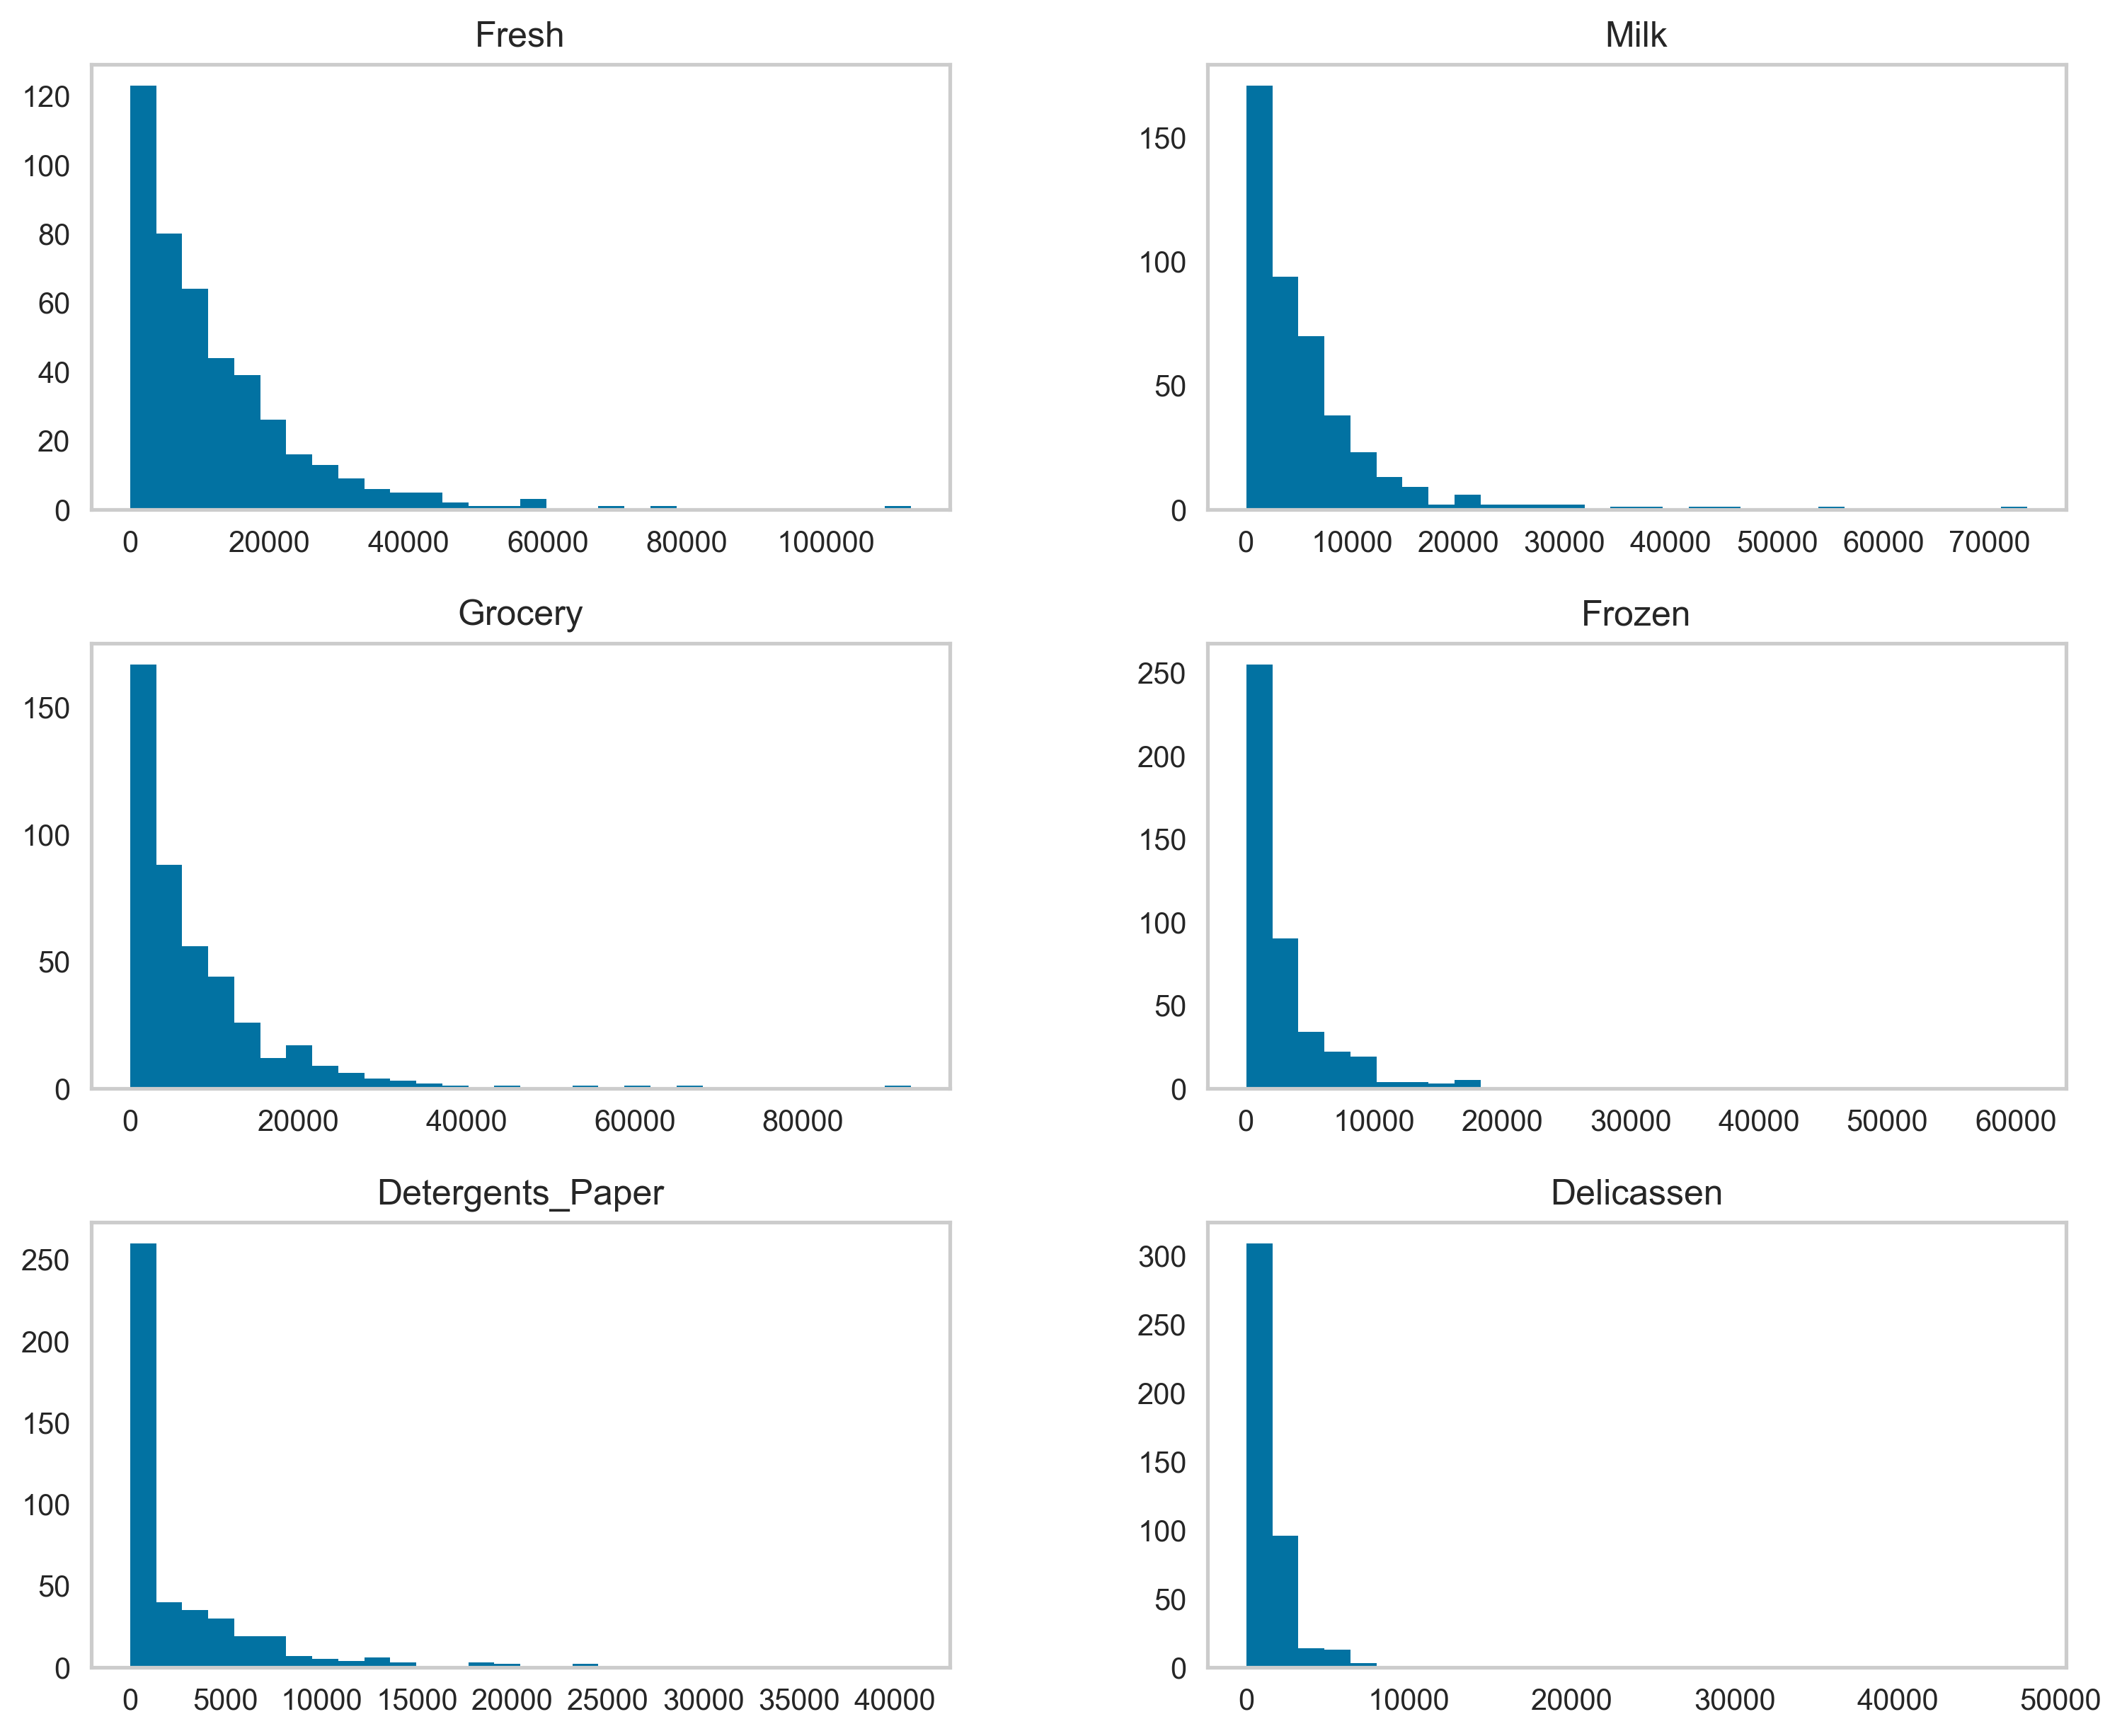

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [148]:
numeric = ['Fresh', 'Milk', 'Grocery', 'Frozen',
           'Detergents_Paper', 'Delicassen']

categorical = ['Channel', 'Region']

data[numeric].hist(bins=30, figsize = (12,10), grid = False)
plt.show()

data[numeric].skew()

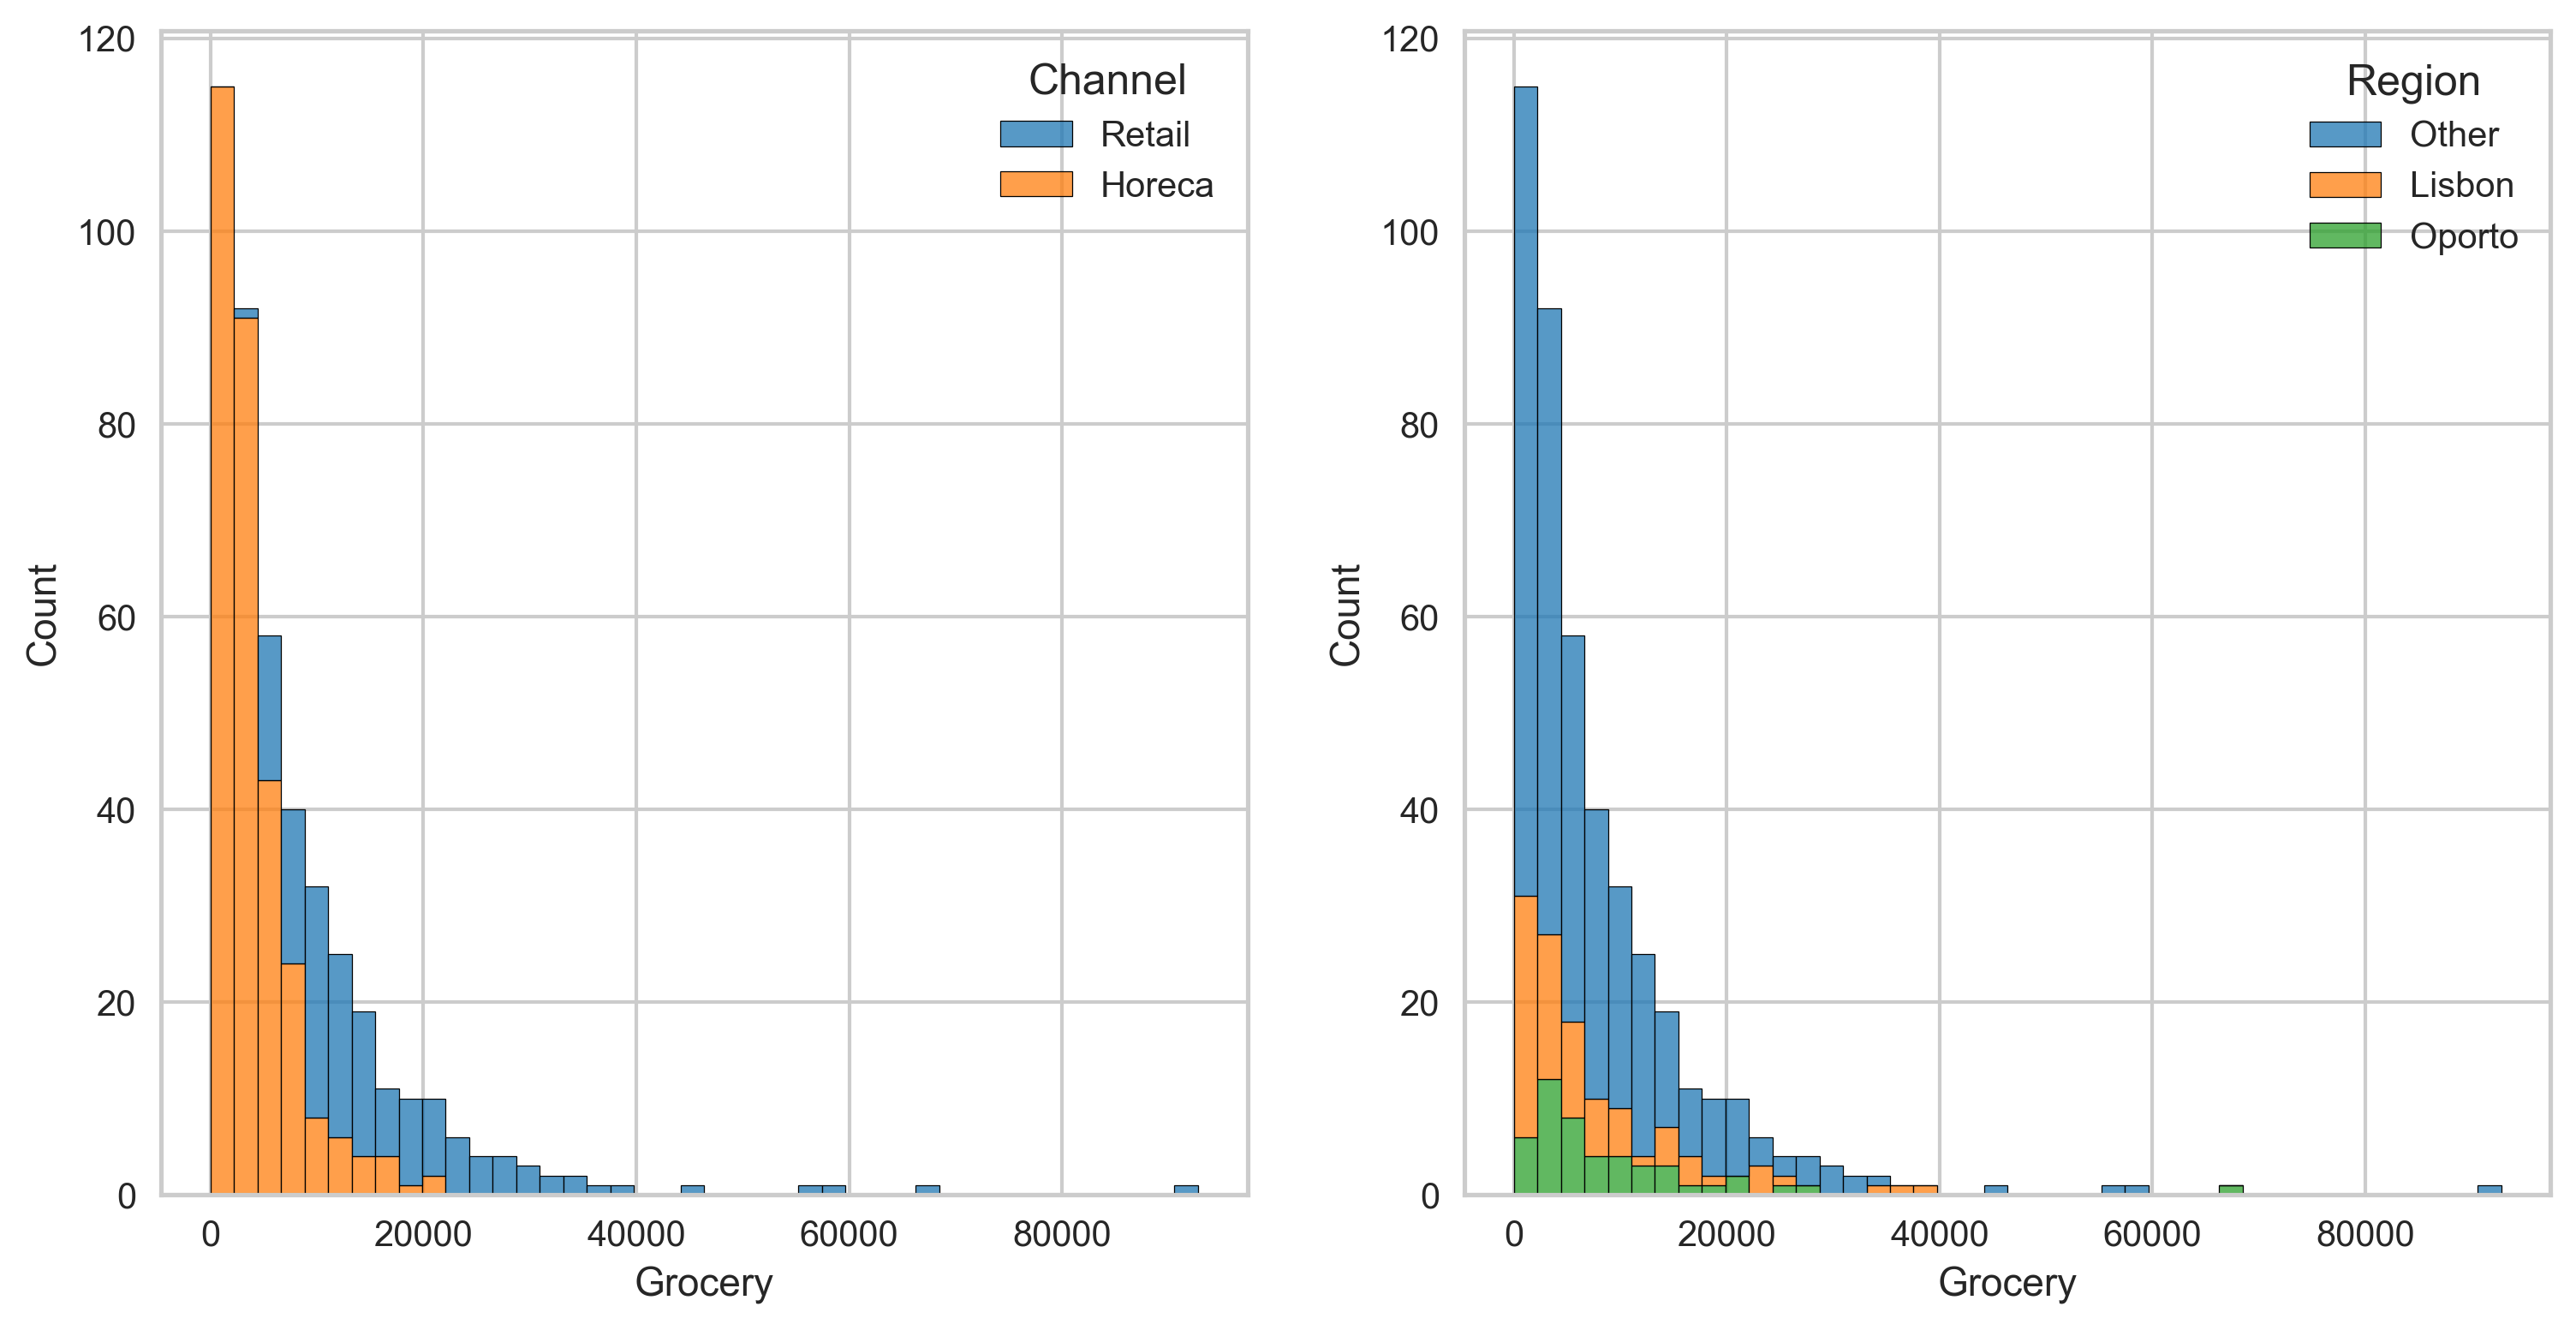

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12,6))

for ax, col in zip(axes.flatten(), categorical):
    sns.histplot(data=data, x ='Grocery', palette = 'tab10',
                 hue=col, multiple='stack', ax=ax)

plt.show()

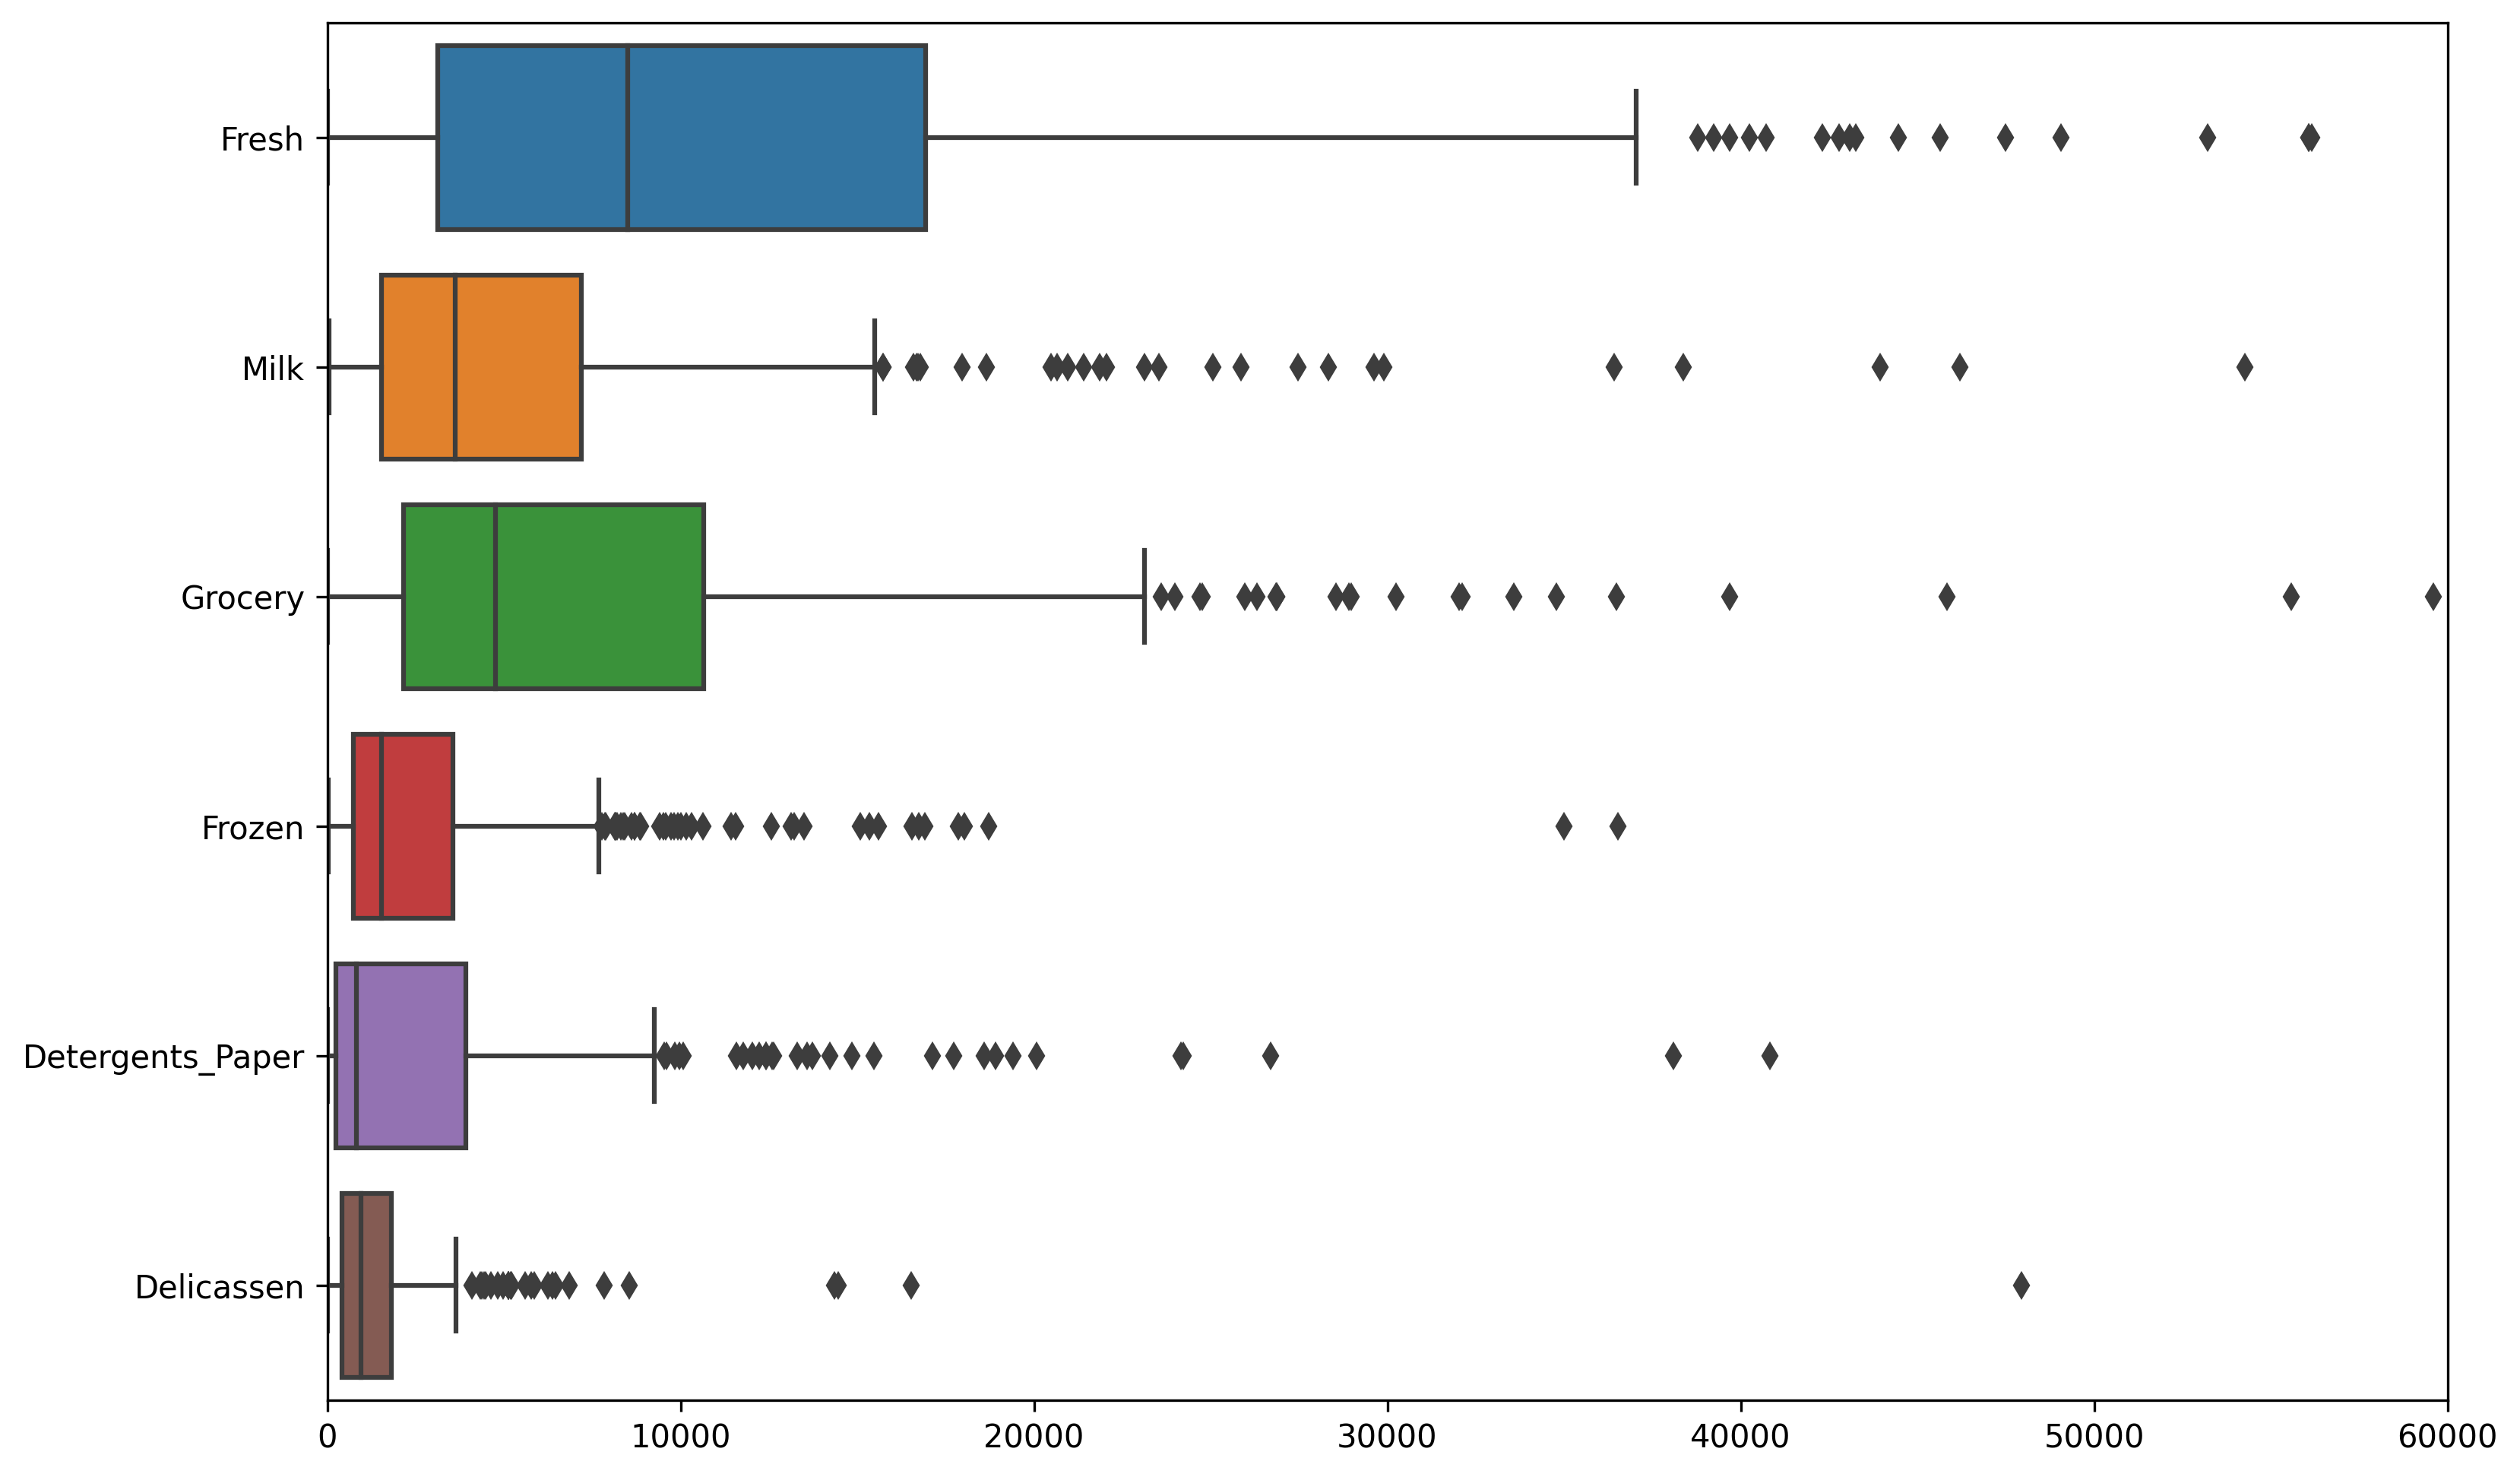

In [25]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=data[numeric], orient='h', ax = ax)
ax.set_xlim(0, 60000)

plt.show()

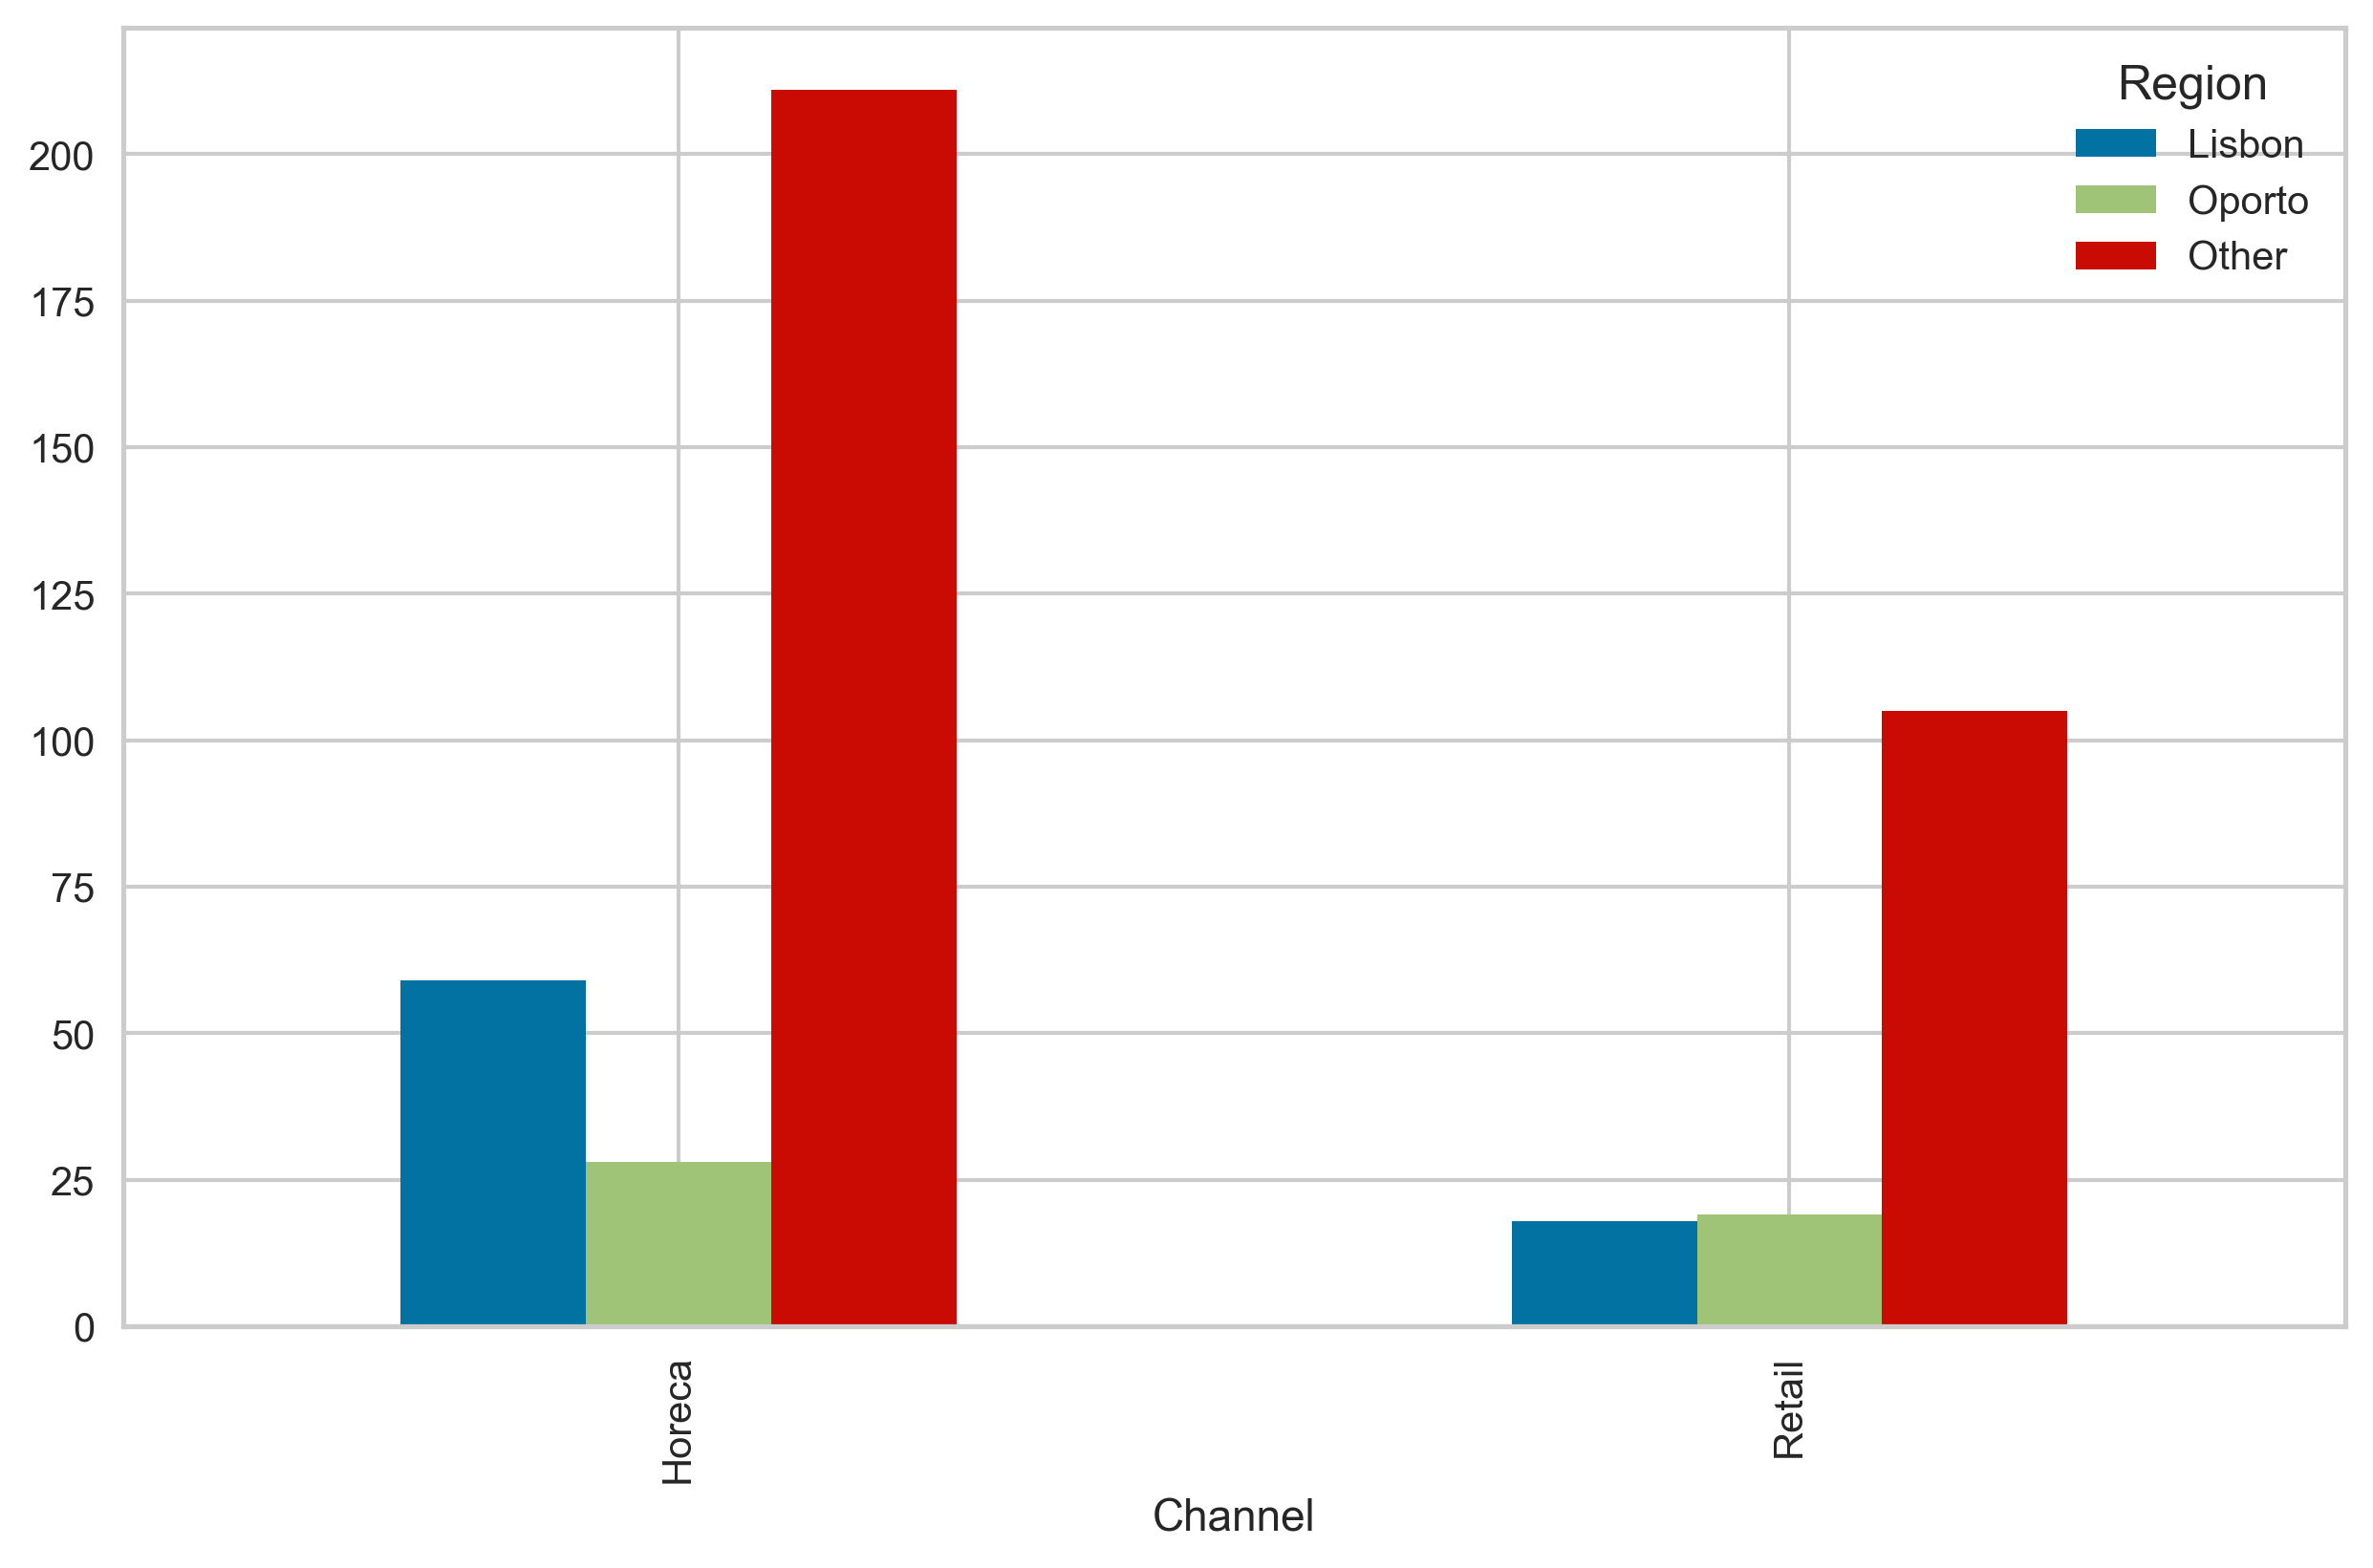

In [155]:
group = data.groupby(['Channel', 'Region']).size().unstack()
group.plot(kind='bar', figsize=(10,6))

plt.show()

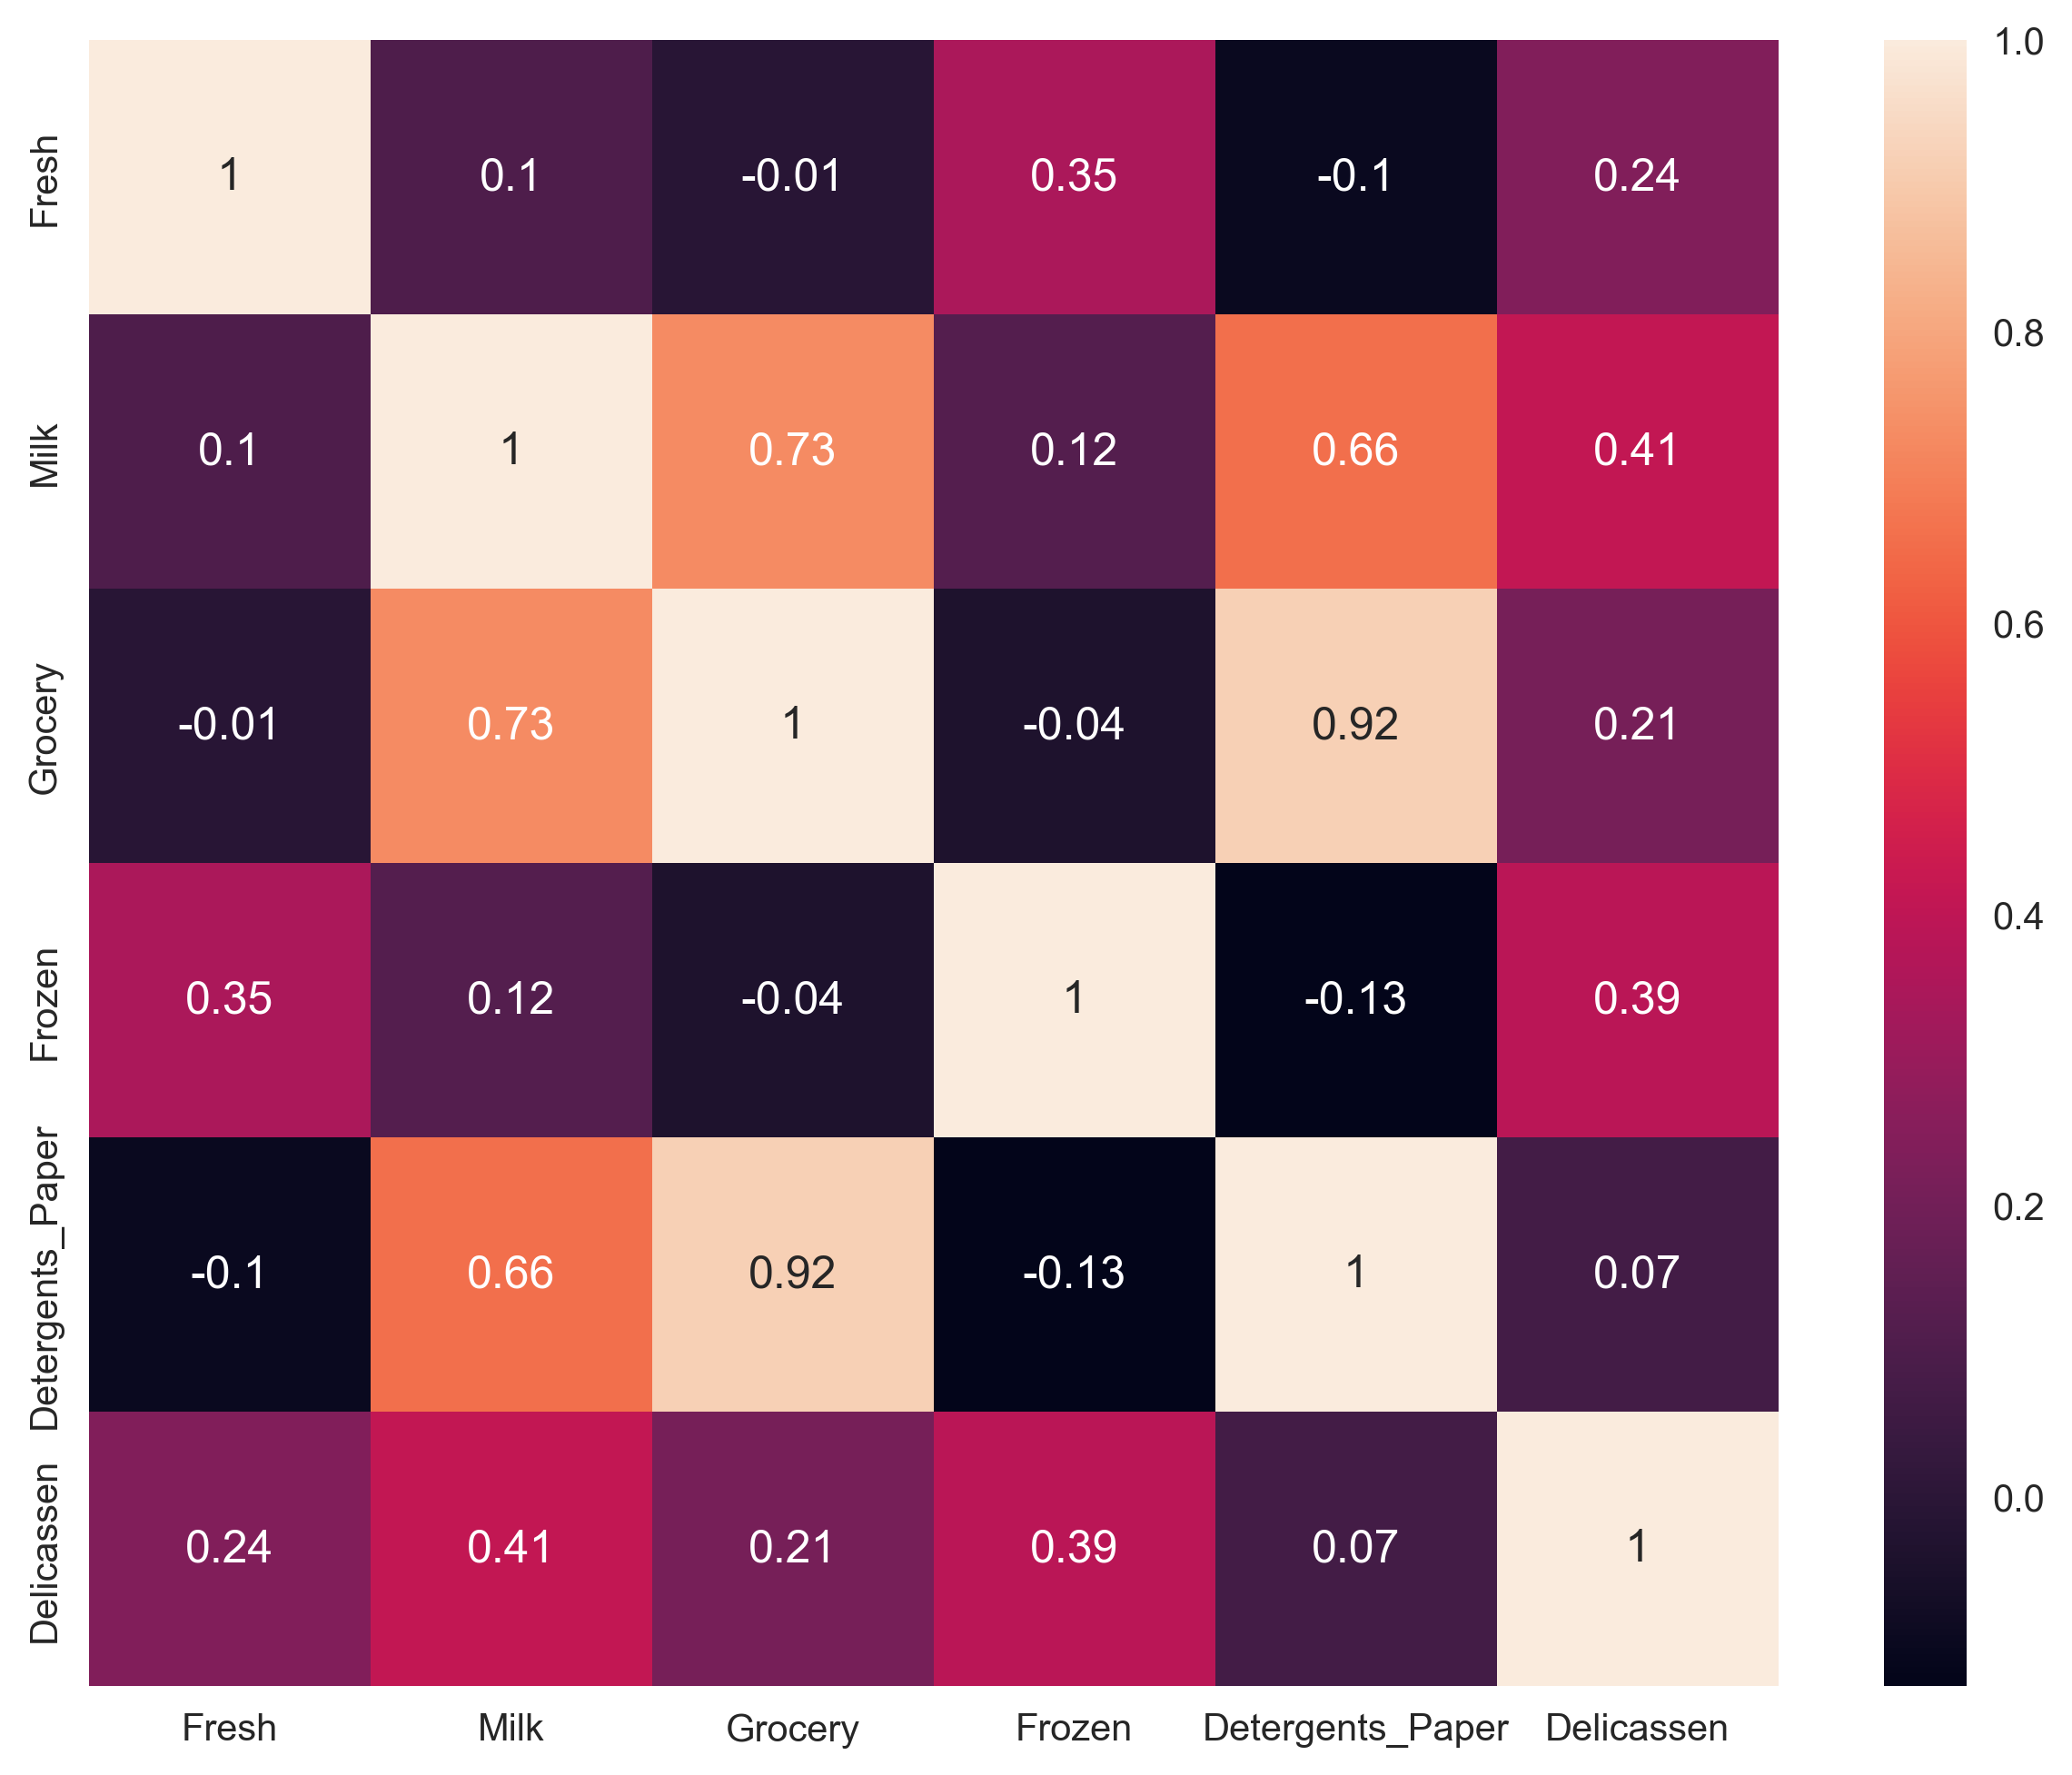

In [159]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(decimals=2), annot=True)

plt.show()

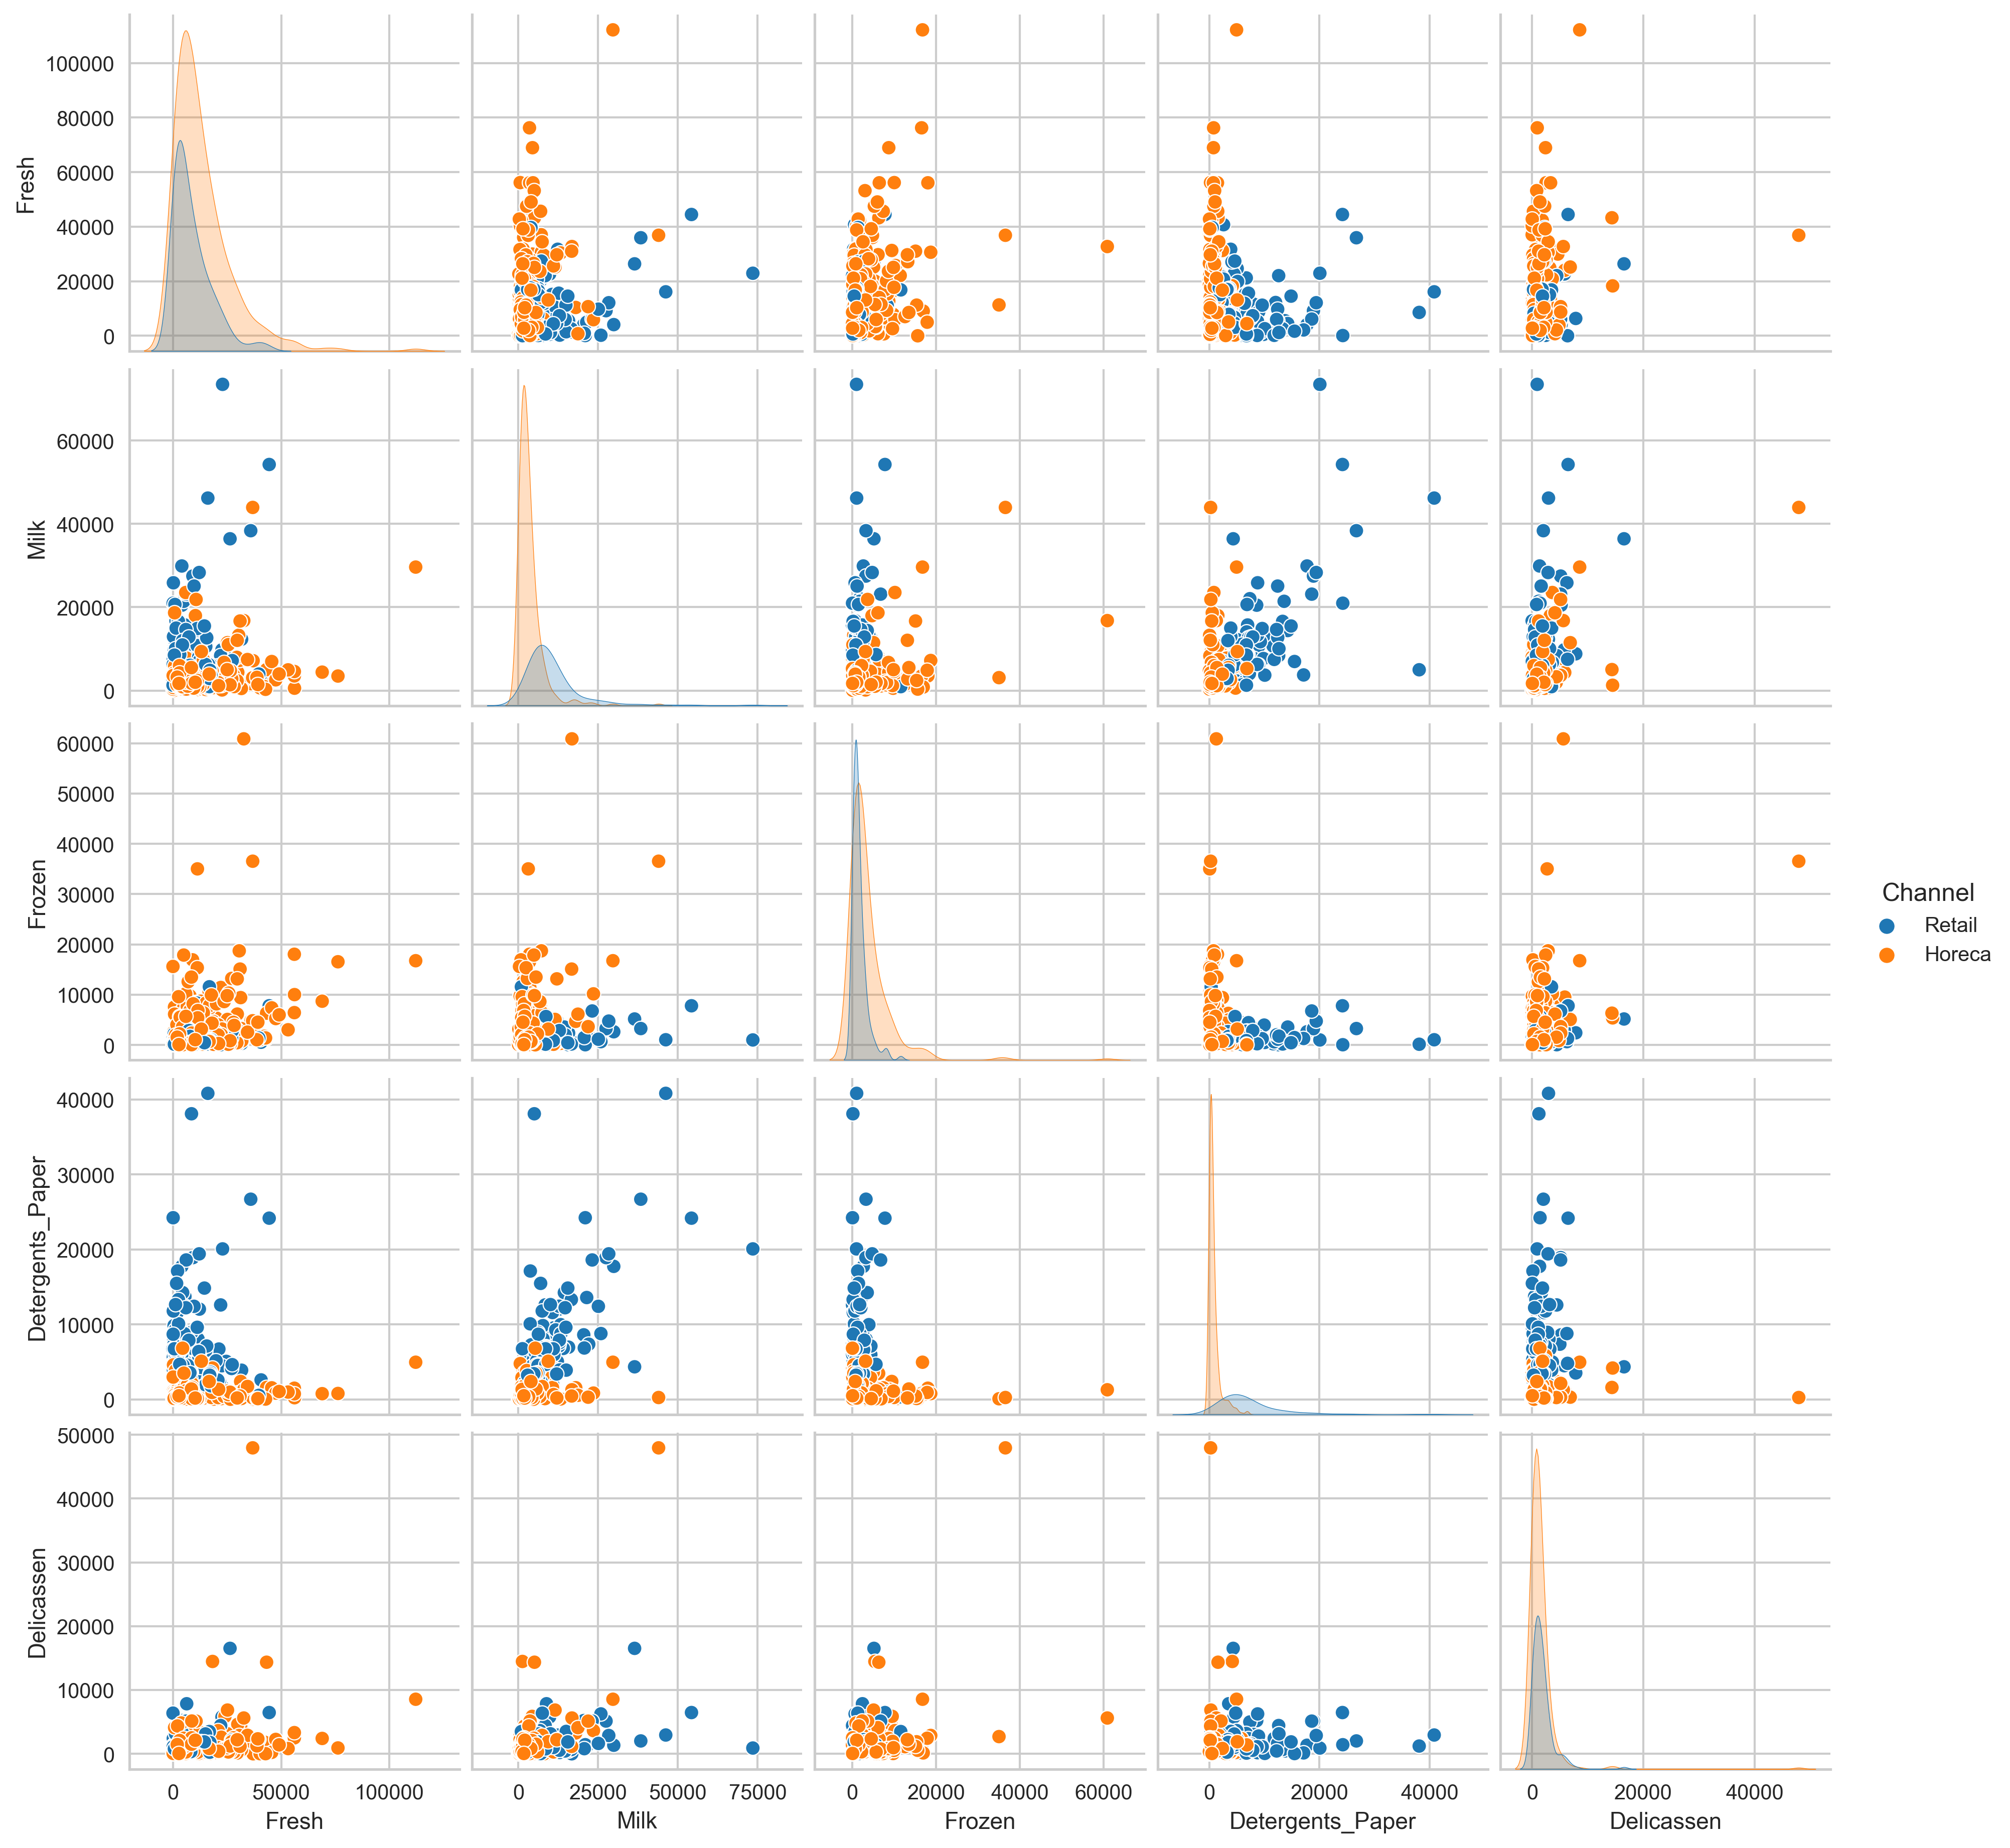

In [264]:
cols = ['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicassen']

sns.pairplot(data, vars=cols, hue='Channel', palette='tab10')

plt.show()

### Initializing the PyCaret Environment

In [137]:
anomaly = setup(data, transformation = False)

,Description,Value
0,session_id,1702
1,Original Data,"(440, 8)"
2,Missing Values,False
3,Numeric Features,6
4,Categorical Features,2
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(440, 11)"
9,CPU Jobs,-1


### Creating the Model

In [337]:
model = create_model('lof', fraction = 0.05)

### Assigning the Model

In [341]:
data_assigned = assign_model(model)

data_assigned.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Anomaly,Anomaly_Score
0,2,3,12669,9656,7561,214,2674,1338,0,1.107687
1,2,3,7057,9810,9568,1762,3293,1776,0,1.027102
2,2,3,6353,8808,7684,2405,3516,7844,0,1.398439
3,1,3,13265,1196,4221,6404,507,1788,0,1.200384
4,2,3,22615,5410,7198,3915,1777,5185,0,1.164052


In [342]:
data_assigned.query('Anomaly == 1')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Anomaly,Anomaly_Score
23,2,3,26373,36423,22019,5154,4337,16523,1,2.249573
47,2,3,44466,54259,55571,7782,24171,6465,1,3.224197
61,2,3,35942,38369,59598,3254,26701,2017,1,2.799411
65,2,3,85,20959,45828,36,24231,1423,1,2.120687
71,1,3,18291,1266,21042,5373,4173,14472,1,2.273296
85,2,3,16117,46197,92780,1026,40827,2944,1,3.970515
86,2,3,22925,73498,32114,987,20070,903,1,3.435620
93,1,3,11314,3090,2062,35009,71,2698,1,3.421567
125,1,3,76237,3473,7102,16538,778,918,1,2.366692
145,2,3,22039,8384,34792,42,12591,4430,1,1.984799


In [343]:
data_inlier = data_assigned.query('Anomaly == 0')

data_inlier.skew()

Channel             0.783535
Region             -1.276067
Fresh               1.607831
Milk                1.979165
Grocery             1.632621
Frozen              2.249175
Detergents_Paper    2.088970
Delicassen          3.414133
Anomaly             0.000000
Anomaly_Score       1.574391
dtype: float64

### Plotting the Model

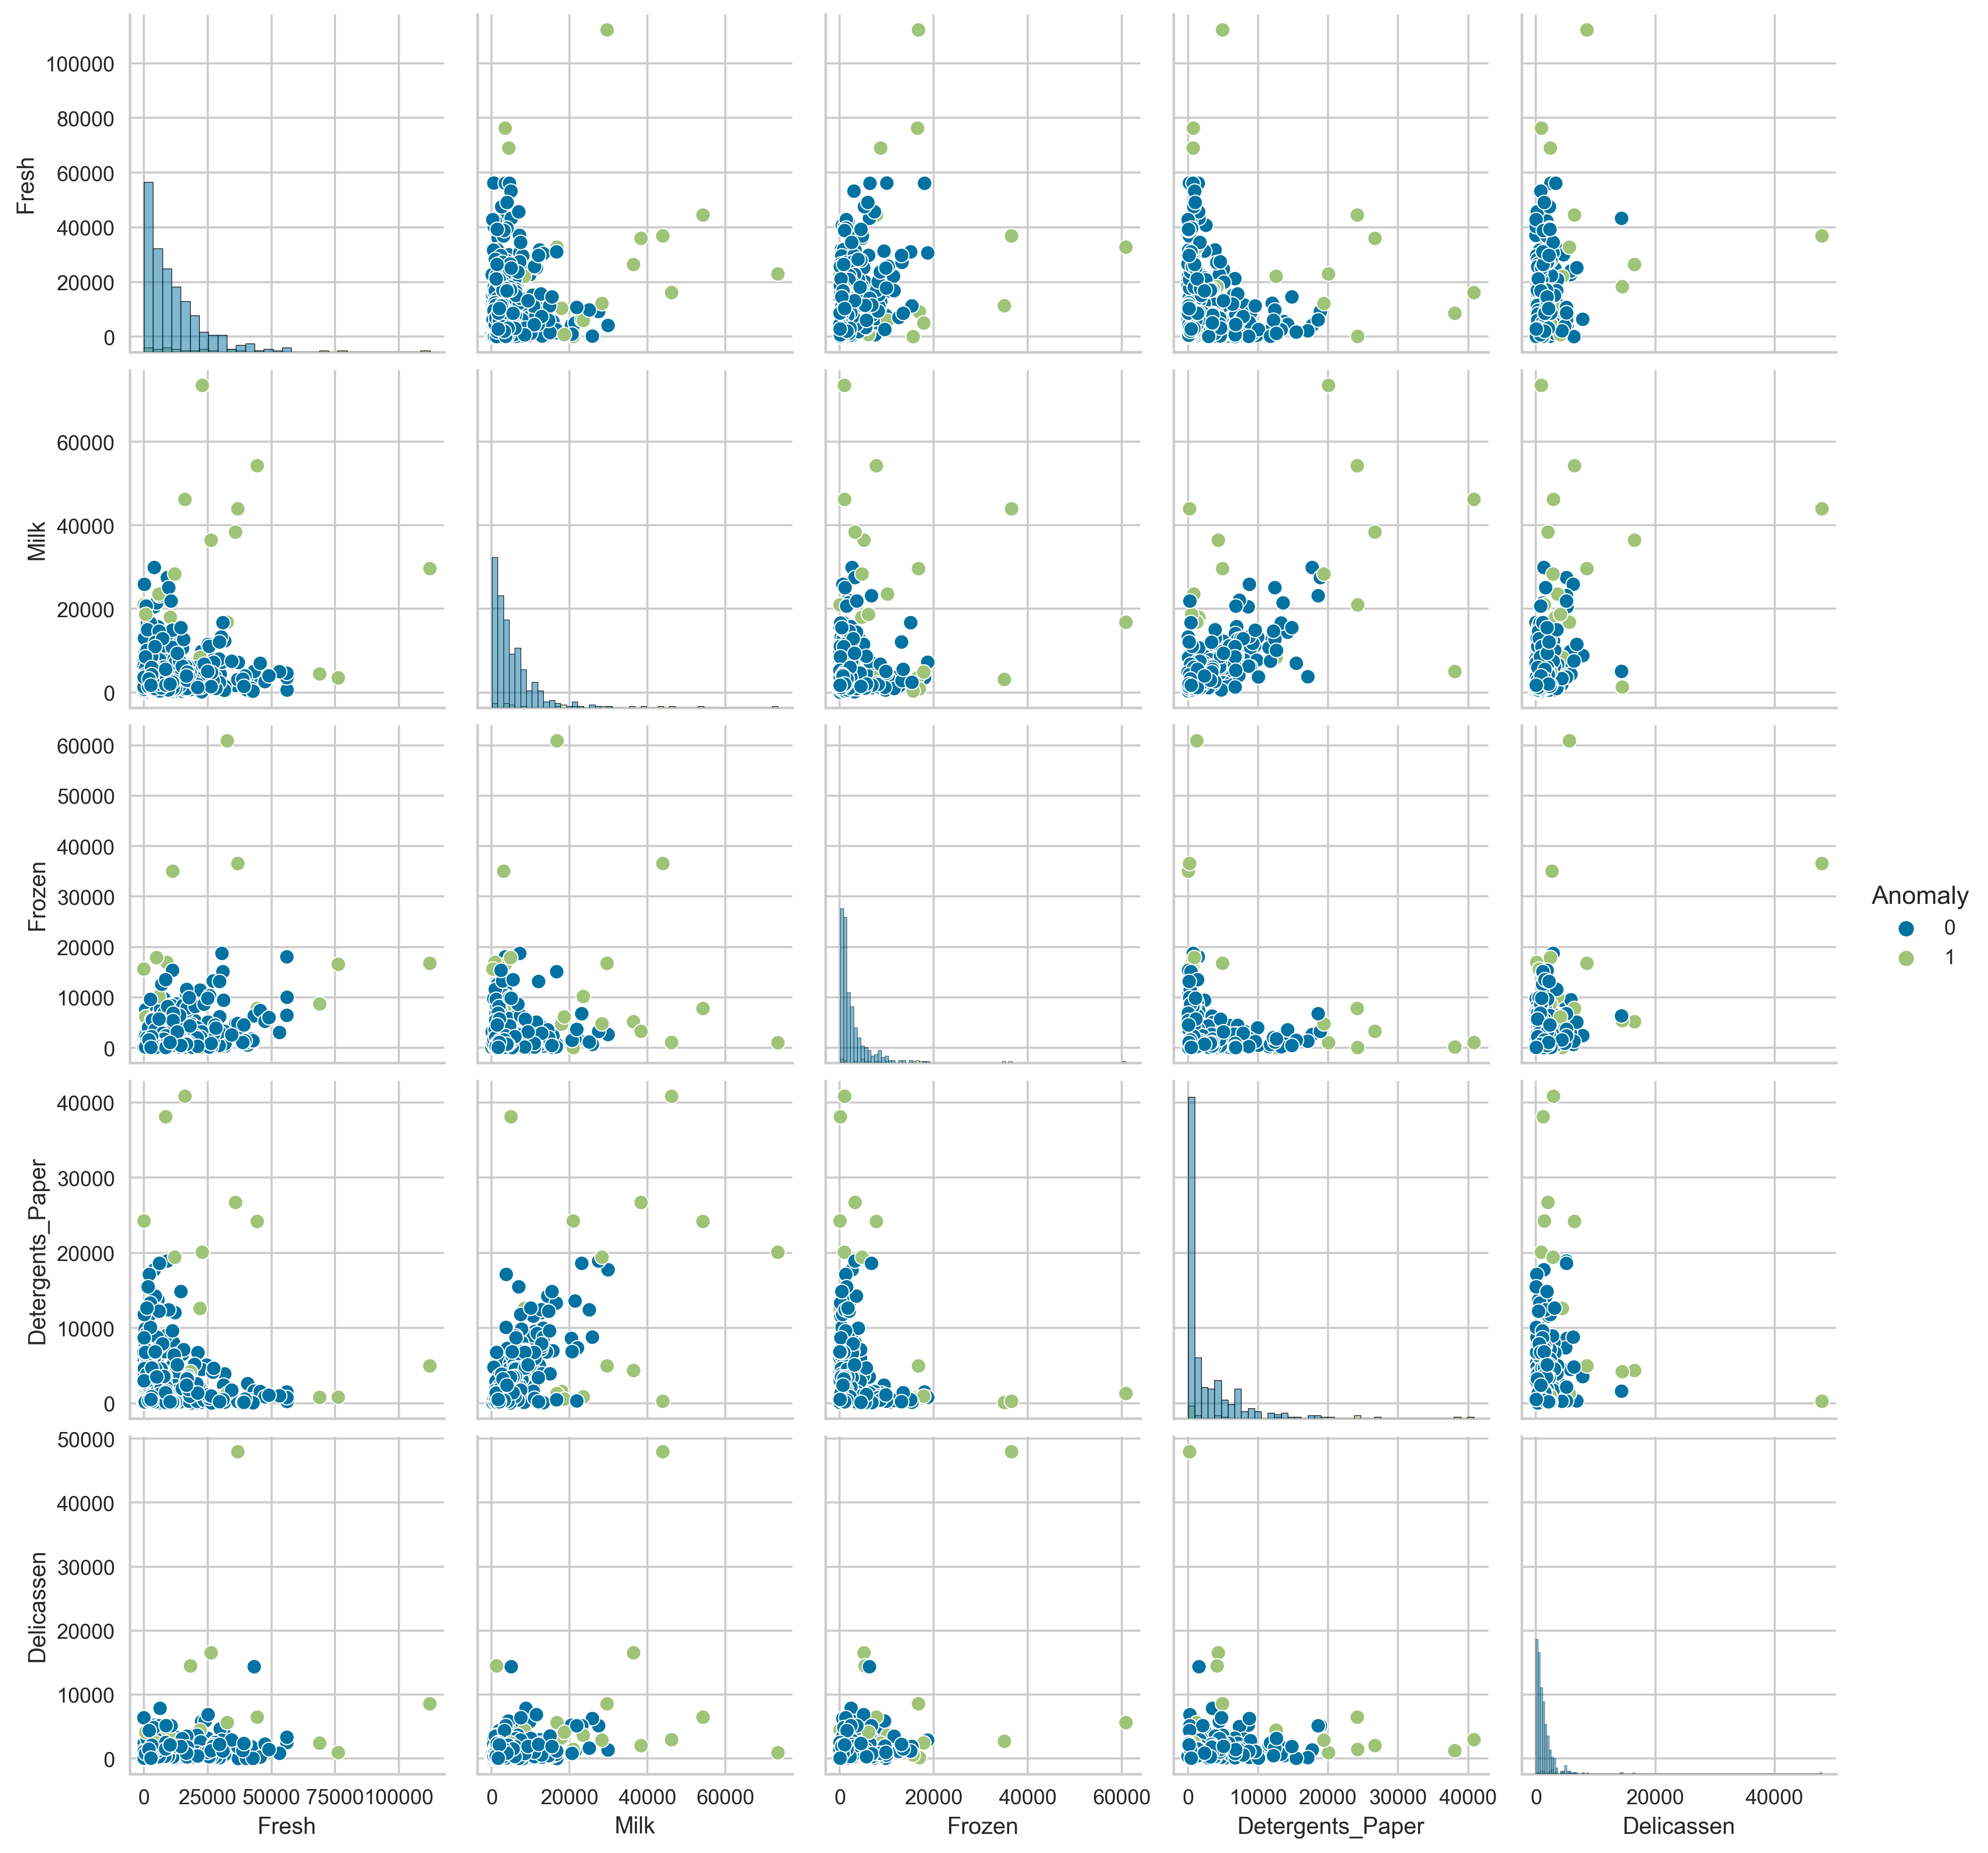

In [319]:
cols = ['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicassen']

sns.pairplot(data_assigned, vars=cols, hue='Anomaly', diag_kind = 'hist')

plt.show()

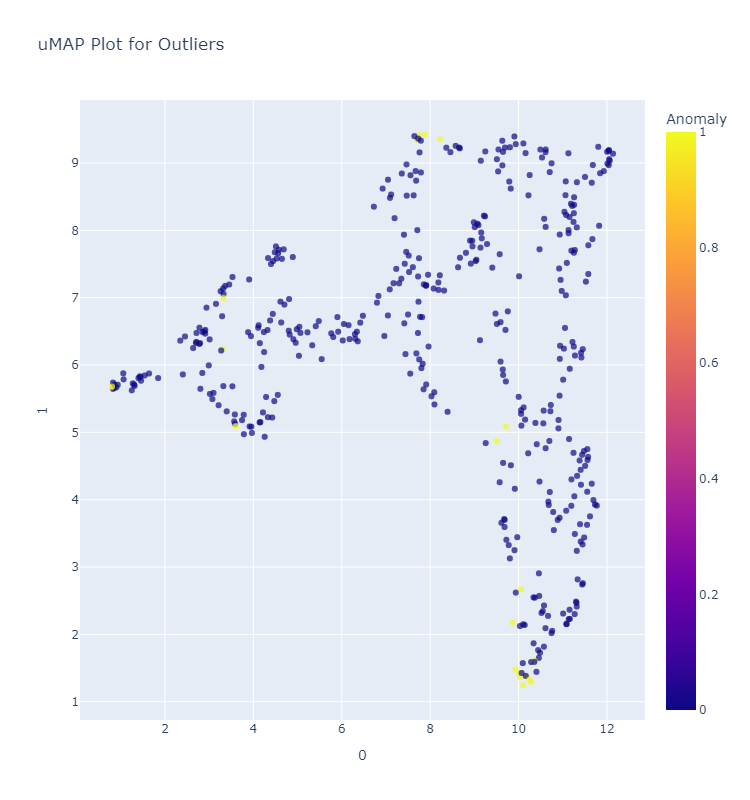

In [305]:
plot_model(model, 'umap')